In [1]:
from scipy.special import logit
import pandas as pd

## Regression against the demographics:
## DJ preprocessed the data using sql
## 1 worker per row: count
##    - count: number of identical rows
##    - participation: number of submissions
##  if count <> participation, worker changed his reponses (participation - count) times

dem_df = pd.read_csv("demographics_preprocessed.csv")

dem_df["household_income"]=dem_df["household_income"].astype("category")
dem_df["household_size"]=dem_df["household_size"].astype("category")
dem_df["location_country"]=dem_df["location_country"].astype("category")
dem_df["marital_status"]=dem_df["marital_status"].astype("category")
dem_df["year_of_birth"]=dem_df["year_of_birth"].astype(int)

dem_df['propensity'] = dem_df['participation']/29
dem_df['life_event'] = dem_df['count']!= dem_df['participation']
dem_df['life_event'] = dem_df['life_event'].apply(lambda x : 1 if x else 0)
dem_df['location_country'] = dem_df['location_country'].apply(lambda x : x if x in ['US','IN','CA','GB','PH'] else 'OTHER')
dem_df['age'] = 2017 - dem_df['year_of_birth']

len(dem_df)

39460

In [2]:
import math
import statsmodels.formula.api as sm

formula = "propensity ~ C(location_country) + C(gender) +  C(household_income)+ C(household_size) + C(marital_status) + age + C(life_event)"

result = sm.ols(formula=formula, data=dem_df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             propensity   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     578.3
Date:                Fri, 15 Dec 2017   Prob (F-statistic):               0.00
Time:                        23:11:42   Log-Likelihood:                 43156.
No. Observations:               39460   AIC:                        -8.626e+04
Df Residuals:                   39432   BIC:                        -8.602e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    0.3227      0.115      2.812      0.005       0.098       0.548
C(location_country)[T.GB]                   -0.0050      0.005     -0.946      0.344      -0.015       0.005
C(location_country)[T.IN]                    0.0119      0.004      3.199      0.001       0.005       0.019
C(location_country)[T.OTHER]                -0.0026      0.004     -0.687      0.492      -0.010       0.005
C(location_country)[T.PH]                   -0.0016      0.008     -0.212      0.832      -0.017       0.013
C(location_country)[T.US]                    0.0032      0.003      0.919      0.358      -0.004       0.010
C(gender)[T.female]                          0.0065      0.081      0.080      0.936      -0.153       0.165
C(gender)[T.male]                            0.0062      0.081      0.077      0.939      -0.153       0.165
C(household_income)[T.$100,000 or more]      0.0053      0.002      2.630      0.009       0.001       0.009
C(household_income)[T.$15,000-$24,999]       0.0040      0.002      2.066      0.039       0.000       0.008
C(household_income)[T.$25,000-$39,999]       0.0047      0.002      2.561      0.010       0.001       0.008
C(household_income)[T.$40,000-$59,999]       0.0052      0.002      2.843      0.004       0.002       0.009
C(household_income)[T.$60,000-$74,999]       0.0014      0.002      0.689      0.491      -0.003       0.005
C(household_income)[T.$75,000-$99,999]       0.0040      0.002      1.977      0.048    3.44e-05       0.008
C(household_income)[T.Less than $10,000]     0.0074      0.002      3.906      0.000       0.004       0.011
C(household_size)[T.2]                      -0.0026      0.001     -1.867      0.062      -0.005       0.000
C(household_size)[T.3]                      -0.0005      0.001     -0.347      0.729      -0.003       0.002
C(household_size)[T.4]                      -0.0017      0.001     -1.117      0.264      -0.005       0.001
C(household_size)[T.5+]                     -0.0005      0.002     -0.320      0.749      -0.004       0.003
C(marital_status)[T.cohabitating]           -0.3186      0.081     -3.928      0.000      -0.478      -0.160
C(marital_status)[T.divorced]               -0.3241      0.081     -3.996      0.000      -0.483      -0.165
C(marital_status)[T.engaged]                -0.3208      0.081     -3.954      0.000      -0.480      -0.162
C(marital_status)[T.married]                -0.3147      0.081     -3.880      0.000      -0.474      -0.156
C(marital_status)[T.separated]              -0.3510      0.115     -3.060      0.002      -0.576      -0.126
C(marital_status)[T.single]                 -0.3161      0.081     -3.898      0.000      -0.475      -0.157
C(marital_status)[T.widowed]   

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
mpl.rc("figure", figsize=(16, 8))
mpl.rcParams.update({'font.size': 22})

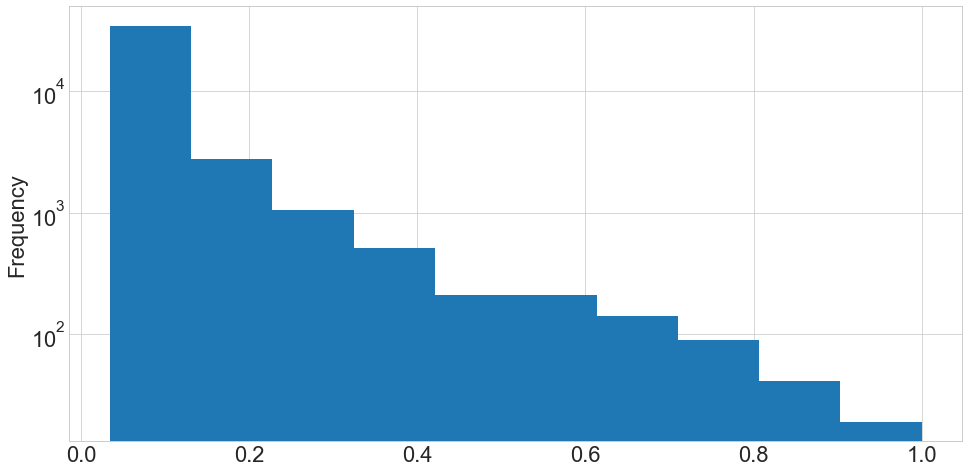

In [4]:
dem_df.propensity.plot.hist(log=True)